<div style="text-align: center"> Université de La Réunion - Master Energie - M1
<div style="text-align: center"> S4PH120 | 1 | Simulation Numérique et Multiphysique CiTDTP-2

## Utilisation de Python pour résoudre des EDP (suite)


### Projet 1 - La méthode des différences finies

#### Exercice 2 (Q. 5) - Résolution de l'équation de convection

**Eléments de syntaxe :**

1. Importer les modules requis (```numpy``` pour la manipulation des vecteurs et des matrices et ```matplotlib.pyplot``` pour les représentations graphiques).



2. Définir les constantes et données du problème. Application : $a = 0,b = 1, c = 4, J = 40, N = 60, \sigma = 0.8$.



3. Définir le vecteur discret $x$ en utilisant la fonction ```linspace``` de ```numpy```. Définir le pas de discrétisation en espace, $\delta x$.



4. A partir de $\sigma$, définir le pas de discrétisation en temps, $\delta t$. Définir le vecteur discret $t$ en utilisant la fonction ```arange``` de ```numpy```.

Rappel : $\sigma = \frac{c \delta t}{\delta x}$


5. Définir la fonction ```u0(x)``` pour la condition initiale, $u_0(x) = x$.



6. Définir la fonction ```phi(t)``` pour la condition à la limite (CL) bord gauche, $\varphi(t) = \sin(10 \pi t)$.



7. Définir la fonction ```sol_ex(x,T,a,b,c)``` qui renvoie ```u(x,T)``` solution exacte de l'équation de convection à l'instant $T$.


![Sol_ex](Sol_ex_Eq_Convection.jpg)

8. Représenter la solution exacte pour différentes valeurs de $t = n \delta t$. Application : prendre $n = 10, 20, 30, 40, 50$.



9. Implémenter le schéma numérique en vous appuyant sur l'algorithme suivant (**nota : la boucle sur $j$ pour $j$ définissant l'intérieur du domaine, est imbriquée dans la boucle sur $n$**) :


![Schema_Numerique](Schema_Numerique_Eq_Convection.jpg)

10. Représenter la solution approchées pour différentes valeurs de $t = n \delta t$. Application : prendre $n = 10, 20, 30, 40, 50$.


11. Que se passe-t-il si on prend $\sigma = 1.$ ? puis $\sigma = 1.1$ ? Conclure.

In [13]:
import numpy as np
import matplotlib.pyplot as plt


a = 0
b = 1
c = 4    # vitesse 
J = 40   # interval a;b divisé en 40
N = 60   
sigma = 0.8


In [14]:
delta_x = (b - a) / J # Définir le vecteur discret  𝑥
x = np.linspace(a, b, J + 1)  # Définir le pas de discrétisation en delta x

#4.sigma = c * delta_t / delta_x
delta_t = sigma * delta_x / c  #pas de discrétisation 
t = np.arange(0, (N + 1) * delta_t, delta_t)

#5. fonction u0(x) pour la condition initiale, u_0(x) = x.
def u0(x):
    return x

#6.fonction phi(t)  phi(t) = sin(10 * pi * t).
def phi(t):
    return np.sin(10 * np.pi * t)

In [15]:
# 7. Définir la fonction sol_ex(x, T, a, b, c) qui renvoie u(x, T) solution exacte de l'équation de convection à l'instant T
def sol_ex(x, T, a, b, c):
    u = np.zeros_like(x)   #tableau u
    for i in range(len(x)):
        if x[i] - c * T > a:
            u[i] = u0(x[i] - c * T)
        else:
            u[i] = phi(T - (x[i] - a) / c)
    return u


In [16]:
#8. Représenter la solution exacte pour différentes valeurs de t = n * dt

    #[10, 20, 30, 40, 50]
    

#Sol numerique*************
u = np.zeros((N+1, J+1))  # u pour stocker les valeurs de u(x, t)
u[0, :] = u0(x)  # Condition initiale

    
for n in range(N):
    for j in range(1, J+1):
        u[n+1, j] = u[n, j] - (c * delta_t / delta_x) * (u[n, j] - u[n, j-1])

    # Condition à la limite à j=0
    u[n+1, 0] = phi(t[n+1])
    
    
    

In [17]:
#sol exact   
T = 10 * delta_t  
u_exact = sol_ex(x, T, a, b, c)

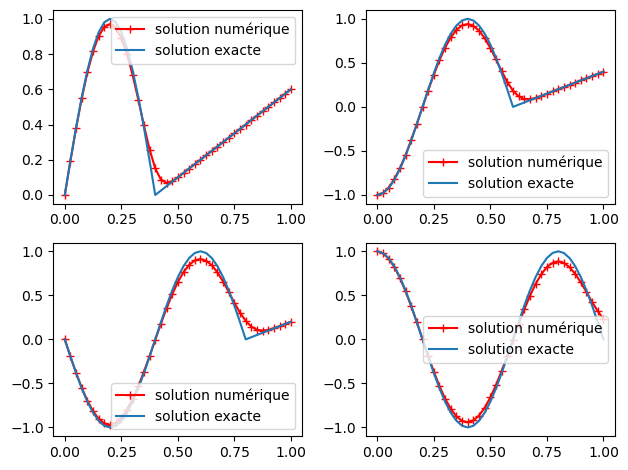

In [18]:
################ affichage #################

lignes = 2  
colonnes = 2  

plt.subplot(lignes, colonnes, 1)
T = 20 * delta_t  
u_exact = sol_ex(x, T, a, b, c)
plt.plot(x, u[20, :],'r+-', label='solution numérique')
plt.plot(x, u_exact, label='solution exacte')
plt.legend()

plt.subplot(lignes, colonnes, 2)
T = 30 * delta_t  
u_exact = sol_ex(x, T, a, b, c)
plt.plot(x, u[30, :],'r+-', label='solution numérique')
plt.plot(x, u_exact, label='solution exacte')
plt.legend()

plt.subplot(lignes, colonnes, 3)
T = 40 * delta_t  
u_exact = sol_ex(x, T, a, b, c)
plt.plot(x, u[40, :],'r+-', label='solution numérique')
plt.plot(x, u_exact, label='solution exacte')
plt.legend()

plt.subplot(lignes, colonnes, 4)
T = 50 * delta_t  
u_exact = sol_ex(x, T, a, b, c)
plt.plot(x, u[50, :],'r+-', label='solution numérique')
plt.plot(x, u_exact, label='solution exacte')
plt.legend()

plt.tight_layout()
plt.show()

Elements de correction (figures à reproduire, ici pour $\sigma = 0.8$)

*******************************************************************

### Réitération de l'exercice avec $\sigma = 1$ et  $\sigma = 1.1$

![Sol_app](Sol_app_Eq_Convection.jpg)


In [ ]:
#varier pour 1.1 et 1 